Chapter 25
# 平面Lp范数等高线
Book_2《可视之美》 | 鸢尾花书：从加减乘除到机器学习  

In [2]:
import matplotlib.pyplot as plt
import numpy as np

import os
# 如果文件夹不存在，创建文件夹
if not os.path.isdir("Figures"):
    os.makedirs("Figures")

## 创建数据

In [3]:
p_values = [1, 1.5, 2, 4, 8, np.inf]
# 给定不同p值

x1 = np.linspace(-2.5, 2.5, num=101);
x2 = x1;

xx1, xx2 = np.meshgrid(x1,x2)

## 自定义Lp范数函数

In [4]:
def Lp_norm(p):
    # 计算范数
    if np.isinf(p):
        zz = np.maximum(np.abs(xx1),np.abs(xx2))
    else:
        zz = ((np.abs((xx1))**p) + (np.abs((xx2))**p))**(1./p)
        
    return zz

## 可视化

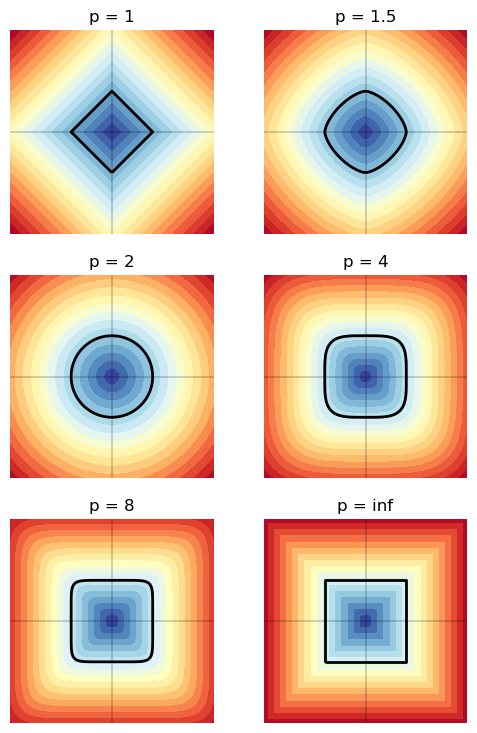

In [5]:
fig, axes = plt.subplots(ncols=2,nrows=3,
                         figsize=(6, 9))

for p, ax in zip(p_values, axes.flat):
    
    # 计算范数
    zz = Lp_norm(p)
    
    # 绘制等高线
    ax.contourf(xx1, xx2, zz, 20, cmap='RdYlBu_r')
    
    # 绘制Lp norm = 1的等高线
    ax.contour (xx1, xx2, zz, [1], colors='k', linewidths = 2) 
    
    # 装饰
    ax.axhline(y=0, color='k', linewidth = 0.25)
    ax.axvline(x=0, color='k', linewidth = 0.25)
    ax.set_xlim(-2.5, 2.5)
    ax.set_ylim(-2.5, 2.5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])
    # ax.set_xlabel('$x_1$')
    # ax.set_ylabel('$x_2$')
    ax.set_title('p = ' + str(p))
    ax.set_aspect('equal', adjustable='box')

fig.savefig('Figures/向量范数.svg', format='svg')